#**Machine Learning Project**

**Fashion-MNIST Image Recognition**

In [ ]:
import keras
from keras.datasets import fashion_mnist
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random
from sklearn import metrics
from sklearn.svm import SVC
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical


**def load_data():** X_train, y_train, X_test, y_test

Loads the training data into X_train and y_train and the testing data into X_test and y_test. Also, this
method showsrandom subset of fashion-MNIST images and then returnsthe training and testing data

In [ ]:
def load_data():
  # loading the dataset
  (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

  # Print random subset of fashion-MNIST images 
  plt.figure(figsize=(6,6))
  for i in range(25):
    r = random.randint(0,59999)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[r], cmap=plt.cm.binary)
  plt.show()
  return x_train, y_train, x_test, y_test

**def normalize_data(X_train, X_test):** X_train, X_test

Converts the received training and testing data from integer to float, normalizes their range from
[0, 255] to [0, 1], and then returns the normalized data.

In [ ]:
def normalize_data(X_train, X_test): 
  
  # Convert received data from integer to float
  train_normalized = X_train.astype('float32')
  test_normalized = X_test.astype('float32')

  # # normalize the data
  train_normalized /= 255.0
  test_normalized /= 255.0

  return train_normalized , test_normalized

**def extract_features(X_train, X_test):** train_features, test_features

Extracts the data features by flattening the received 28 × 28 × 1 images to a vector of size 28 ∗ 28 ∗
1 for each image and then returns the extracted training and testing features. Note that, in this case
each image pixel is considered a feature for that image.

In [ ]:
def extract_features(X_train, X_test):

  #Extracting the features by reshaping them
  train_features = np.reshape(X_train,(60000, 784))
  test_features = np.reshape(X_test,(10000, 784))
  
  return train_features, test_features

**def reduce_features(features, train_features, test_features): train_features,
test_features**

Applies PCA reduction technique to reduce the training and testing features size from 28 ∗ 28 ∗ 1 to
the received features size and then returns the reduced training and testing features.

In [ ]:
def reduce_features(features, train_features, test_features):

  pca = PCA(n_components = features)

  #Perform PCA on pre-scaled training features 
  pca.fit(train_features)
  #Transform the large number of train features to less of them
  train_features = pca.transform(train_features)

  #Perform PCA on pre-scaled testning features 
  pca.fit(test_features)

  #Transform the large number of test features to less of them
  test_features = pca.transform(test_features)

  return train_features, test_features

**def encode_output(y_train, y_test):** y_train, y_test

Encodes the labels as one-hot representation and returns the encoded outputs.


In [ ]:
def encode_output(y_train, y_test):
  y_train_encode = to_categorical(y_train)
  y_test_encode = to_categorical(y_test)
  return y_train_encode, y_test_encode

**def create_MLP(features, classes):** model

Creates a baseline MLP keras model for the received features size and number of classes with an
appropriate activation function, compiles the model using adam optimizer and an appropriate loss
function, and returns the model.


In [ ]:
def create_MLP(features, classes):
  MLP = Sequential()
  MLP.add(Dense(256, input_shape=features, activation='relu')) 
  MLP.add(Dense(classes, activation='softmax')) #output layer
 #optimization
  MLP.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return MLP

**def create_CNN(height, weight, channels, classes):** model

Builds a baseline CNN keras model for the received images height, width, number of channels, and
number of classes with an appropriate activation function, compiles the model using adam optimizer
and an appropriate loss function, and returns the model.


In [ ]:
def create_CNN(height, width, channels, classes):
 model = Sequential()
 model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(height, width, channels), strides=(1,1),padding="same"))
 model.add(MaxPooling2D((2, 2)))
 model.add(Flatten())
 model.add(Dense(100, activation='relu'))
 model.add(Dense(classes, activation='softmax'))
 model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
 return model

**def create_SVM(c):** model

Defines a polynomial SVM model with the received regularization parameter and returns the model.


In [ ]:
def create_SVM(c):
  model = SVC(C=c ,kernel='poly') 
  return model

**def evaluate_NN(X_test, y_test, model):** accuracy, precision, recall, f1_score

Evaluates the received MLP or CNN model on the received testing data, calculates the accuracy,
precision, recall, and f1-score measures, and then returns them. Since it is a multi-class classification
problem, use macro averaging to calculate the global values of the mentioned four measures.


In [ ]:
def evaluate_NN(X_test, y_test, model):
  y_predict = np.argmax(model.predict(X_test), axis = 1)
  y_test = np.argmax(y_test, axis = 1)
  print(metrics.classification_report(y_test, y_predict))
  NN_Accuracy = metrics.accuracy_score(y_test, y_predict)#
  NN_Recall = metrics.recall_score(y_test, y_predict, average = 'macro') #
  NN_Precision = metrics.precision_score(y_test, y_predict, average = 'macro')#
  NN_F1 = metrics.f1_score(y_test, y_predict, average = 'macro')#
  return NN_Accuracy, NN_Recall, NN_Precision, NN_F1

**def evaluate_SVM(X_test, y_test, model):** accuracy, precision, recall, f1_score

Evaluates the received SVM model on the received testing data, calculates the accuracy, precision,
recall, and f1-score measures, and then returns them. Since it is a multi-class classification problem,
use macro averaging to calculate the global values of the mentioned four measures.

In [ ]:
def evaluate_SVM(X_test, y_test, model):
  y_predict = model.predict(X_test)
  print(metrics.classification_report(y_test, y_predict))
  svc_accuracy = metrics.accuracy_score(y_test, y_predict)
  svc_recall = metrics.recall_score(y_test, y_predict, average= 'macro')
  svc_precision = metrics.precision_score(y_test, y_predict, average= 'macro')
  svc_f1 = metrics.f1_score(y_test, y_predict, average= 'macro')
  return svc_accuracy, svc_recall, svc_precision, svc_f1

**def main():**

This is the main method of your script and performs the following tasks:
1. Load fashion-MNIST dataset
2. Normalize the loaded data
3. Extract features from the loaded data
4. Reduce the features size to 100 by utilizing PCA technique.
5. Encode the labels as one-hot representation
6. Define and train the following five models:

  ▪ SVM with the original extracted features

  ▪ SVM with the reduced features

  ▪ MLP with the original extracted features

  ▪ MLP with the reduced features

  ▪ CNN with the normalized data (images)
  
7. Evaluate the trained models based on their accuracy, precision, recall, and f1-score

In [ ]:
def main():
  # 1. Load fashion-MNIST dataset
  x_train, y_train, x_test, y_test = load_data() 
  # 2. Normalize the loaded data
  train_normalized , test_normalized =  normalize_data(x_train, x_test)
  # 3. Extract features from the loaded data
  features_x_train, features_x_test = extract_features(train_normalized , test_normalized)
  # 4. Reduce the features size to 100 by utilizing PCA technique.
  Reduce_x_train, Reduce_x_test = reduce_features(100,features_x_train, features_x_test)
  # 5. Encode the labels as one-hot representation
  y_train_encode, y_test_encode  = encode_output(y_train, y_test)
  
# 6. Define and train the following five models:
     # ▪ SVM with the original extracted features
  SVM_model1 = create_SVM(1)
  SVM_model1.fit(features_x_train, y_train_encode.argmax(axis=1))

     # ▪ SVM with the reduced features
  SVM_model2 = create_SVM(1)
  SVM_model2.fit(Reduce_x_train, y_train_encode.argmax(axis=1))

     # ▪ MLP with the original extracted features
  MLP_model1 = create_MLP(features_x_train.shape[1:], 10)
  MLP_model1.fit(features_x_train, y_train_encode, batch_size= 16, epochs = 10)

     # ▪ MLP with the reduced features
  MLP_model2 = create_MLP(Reduce_x_train.shape[1:], 10)
  MLP_model2.fit(Reduce_x_train, y_train_encode, batch_size= 16, epochs = 10)

     # ▪ CNN with the normalized data (images)
  cnn_model = create_CNN(28, 28, 1, 10)
  cnn_model.fit(train_normalized, y_train_encode, batch_size = 16, epochs = 10)

  # 7. Evaluate the trained models based on their accuracy, precision, recall, and f1-score
     # ▪ SVM
  print("SVM with the original extracted features:")
  svm1_accuracy, svm1_recall, svm1_precision, svm1_f1_score = evaluate_SVM(features_x_test, y_test_encode.argmax(axis = 1), SVM_model1)
  print('Accuracy: {:.2f}'.format(svm1_accuracy))
  print('Recall: {:.2f}'.format(svm1_recall))
  print('Precision: {:.2f}'.format(svm1_precision))
  print('F1-Score: {:.2f}'.format(svm1_f1_score))


  print("SVM with the reduced features:")
  svm2_accuracy, svm2_recall, svm2_precision, svm2_f1_score = evaluate_SVM(Reduce_x_test, y_test_encode.argmax(axis = 1), SVM_model2)
  print('Accuracy: {:.2f}'.format(svm2_accuracy))
  print('Recall: {:.2f}'.format(svm2_recall))
  print('Precision: {:.2f}'.format(svm2_precision))
  print('F1-Score: {:.2f}'.format(svm2_f1_score))


     # ▪ MLP
  mlp1_accuracy, mlp1_recall, mlp1_precision, mlp1_f1_score = evaluate_NN(features_x_test, y_test_encode, MLP_model1)
  print("MLP with the original extracted features: ")
  print('Accuracy: {:.2f}'.format(mlp1_accuracy))
  print('Recall: {:.2f}'.format(mlp1_recall))
  print('Precision: {:.2f}'.format(mlp1_precision))
  print('F1-Score: {:.2f}'.format(mlp1_f1_score))


  mlp2_accuracy, mlp2_recall, mlp2_precision, mlp2_f1_score = evaluate_NN(Reduce_x_test, y_test_encode, MLP_model2)
  print("MLP with the reduced features: ")
  print('Accuracy: {:.2f}'.format(mlp2_accuracy))
  print('Recall: {:.2f}'.format(mlp2_recall))
  print('Precision: {:.2f}'.format(mlp2_precision))
  print('F1-Score: {:.2f}'.format(mlp2_f1_score))


     # ▪ CNN
  cnn_accuracy, cnn_recall, cnn_precision, cnn_f1_score = evaluate_NN(test_normalized, y_test_encode, cnn_model)
  print('CNN with the normalized images: ')
  print('Accuracy: {:.2f}'.format(cnn_accuracy))
  print('Recall: {:.2f}'.format(cnn_recall))
  print('Precision: {:.2f}'.format(cnn_precision))
  print('F1-Score: {:.2f}'.format(cnn_f1_score))


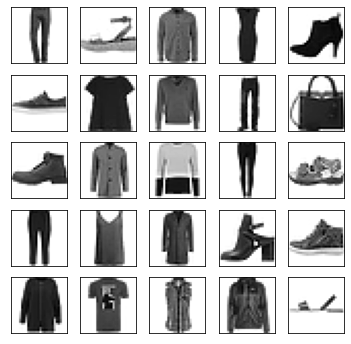

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_6 (Dense)             (None, 100)               627300    
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 628,630
Trainable params: 628,630
Non-trainable params: 0
________________________________________________

KeyboardInterrupt: ignored

In [ ]:
main()